<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/Semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de Crank-Nicolson

Ecuación de difusión discretizada (derivada *forward* en el tiempo):

\begin{equation}
T_{i,j+1} = T_{i,j} + \eta(T_{i+1,j} + T_{i-1,j} - 2T_{i,j})
\end{equation}

Derivada backward:

\begin{equation}
\frac{\partial T}{\partial t} \approx \frac{T(x,t) - T(x,t - \Delta t)}{\Delta t}
\end{equation}

Reemplazando con la derivada central en $x$,

\begin{equation}
\frac{T(x,t) - T(x,t - \Delta t)}{\Delta t} =  \left(\frac{\kappa}{\rho C}\right)\frac{T(x+\Delta x,t) + T(x-\Delta x,t) - 2T(x,t)}{\Delta x^{2}}
\end{equation}

Trasponiendo y cambiando $t\rightarrow t+\Delta t$,

\begin{equation}
T(x,t+\Delta t) = T(x,t) + \frac{\kappa \Delta t}{\rho C \Delta x^{2}}\left[T(x+\Delta x,t + \Delta t) + T(x-\Delta x,t + \Delta t) - 2T(x,t + \Delta t)\right]
\end{equation}

Discretizando,

\begin{equation}
T_{i,j+1} = T_{i,j} + \eta\left(T_{i+1,j+1} + T_{i-1,j+1} - 2T_{i,j+1}\right)
\end{equation}

Derivación "total" = promedio(forward,backward)

\begin{align}
T_{i,j+1} &= T_{i,j} + \frac{\eta}{2}\left(T_{i+1,j} + T_{i-1,j} - 2T_{i,j} + T_{i+1,j+1} + T_{i-1,j+1} - 2T_{i,j+1}\right) \\
\frac{2}{\eta}T_{i,j+1} &= \frac{2}{\eta}T_{i,j} + T_{i+1,j} + T_{i-1,j} - 2T_{i,j} + T_{i+1,j+1} + T_{i-1,j+1} - 2T_{i,j+1} \\
-T_{i-1,j+1} + \left(\frac{2}{\eta} + 2\right)T_{i,j+1} - T_{i+1,j+1} &= T_{i-1,j} + \left(\frac{2}{\eta} - 2\right)T_{i,j} + T_{i+1,j}
\end{align}

Para este caso, $i = 1,2,3,\cdots,n-1$ ($x$ discreta).

Condiciones de frontera: 

\begin{align}
T_{0,j+1} &= T_{0,j} = 0 \\
T_{n,j+1} &=T_{n,j} = 0
\end{align}

Condición inicial: $T_{i,0}$.

#Sistema de ecuaciones:

Para $i=1$,

\begin{equation}
-T_{0,j+1} + \left(2+\frac{2}{\eta}\right)T_{1,j+1} - T_{2,j+1} = T_{0,j} + \left(\frac{2}{\eta}-2\right)T_{1,j} + T_{2,j}
\end{equation} 

$T_{0,j} = 0$ y $T_{0,j+1} = 0$. Entonces,

\begin{equation}
\left(2+\frac{2}{\eta}\right)T_{1,j+1} - T_{2,j+1} = \left(\frac{2}{\eta}-2\right)T_{1,j} + T_{2,j}
\end{equation} 

Para $i=2$,

\begin{equation}
-T_{1,j+1} + \left(2+\frac{2}{\eta}\right)T_{2,j+1} - T_{3,j+1} = T_{1,j} + \left(\frac{2}{\eta}-2\right)T_{2,j} + T_{3,j}
\end{equation}

Para $i=n-1$,

\begin{equation}
-T_{n-2,j+1} + \left(\frac{2}{\eta} + 2\right)T_{n-1,j+1} - T_{n,j+1} = T_{n-2,j} + \left(\frac{2}{\eta} - 2\right)T_{n-1,j} + T_{n,j}
\end{equation}

$T_{n,j} = 0$ y $T_{n,j+1} = 0$. Entonces,

\begin{equation}
-T_{n-2,j+1} + \left(2+\frac{2}{\eta}\right)T_{n-1,j+1} = T_{n-2,j} + \left(\frac{2}{\eta}-2\right)T_{n-1,j}
\end{equation}


**Forma matricial (MATRIZ TRIDIAGONAL):**

\begin{align}
&A\vec{T}_{j+1} = B\vec{T}_{j} \\
&\vec{T}_{k} = (T_{1,k},T_{2,k},T_{3,k},\cdots,T_{n-1,k}),\,k=j,j+1 \\
&\text{ }\\
&A=
\begin{pmatrix}
\left(2 + \frac{2}{\eta}\right) & -1 & 0 & 0 &\cdots & 0 & 0 \\
-1 & \left(2 + \frac{2}{\eta}\right) & -1 & 0 &\cdots & 0 & 0\\
0 & -1 & \left(2 + \frac{2}{\eta}\right) & -1 &\cdots & 0 & 0\\
\vdots & \text{ } & \vdots & \text{ } & \text{ } & \text{ } & -1\\
0 & 0 & 0 & 0 & \cdots & -1 & \left(2 + \frac{2}{\eta}\right)
\end{pmatrix} 
\\
&\text{ }\\
&B=
\begin{pmatrix}
\left(\frac{2}{\eta} - 2\right) & 1 & 0 & 0 &\cdots & 0 & 0 \\
1 & \left(\frac{2}{\eta} - 2\right) & 1 & 0 &\cdots & 0 & 0\\
0 & 1 & \left(\frac{2}{\eta} - 2\right) & 1 &\cdots & 0 & 0\\
\vdots & \text{ } & \vdots & \text{ } & \text{ } & \text{ } & 1\\
0 & 0 & 0 & 0 & \cdots & 1 & \left(\frac{2}{\eta} - 2\right)
\end{pmatrix}
\end{align}


#Solución:

tomado parcialmente de

https://georg.io/2013/12/03/Crank_Nicolson#A-Crank-Nicolson-Example-in-Python



/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


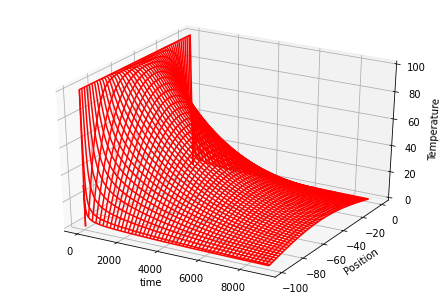

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nx = 101;        Nt = 9000;     Dx = 0.2*pow(10,-1);     Dt = 1.25                                                         
kappa = 237.; C = 900.; rho = 2700.                                                 


T0 = np.array([100 for x in range(1,Nx)])
T0[0] = 0
T0[-1] = 0

eta = (kappa*Dt)/(C*rho*Dx*Dx)

#matrices


A = np.diagflat([-1 for i in range(Nx-2)], -1) +\
    np.diagflat([2 + 2/eta for i in range(Nx-1)]) +\
    np.diagflat([-1 for i in range(Nx-2)], 1)

B = np.diagflat([1 for i in range(Nx-2)], -1) +\
    np.diagflat([2/eta - 2 for i in range(Nx-1)]) +\
    np.diagflat([1 for i in range(Nx-2)], 1)

Templist = []

Templist.append(T0)

for ti in range(1,Nt):
    T1 = np.linalg.solve(A, B.dot(T0))
    
    T0 = T1
    
    Templist.append(T0)

x = list(range(0, Nx-1))             # Plot alternate pts
vart = list(range(0, Nt))                       
X, Tvar = np.meshgrid(x, vart)
Tnew = np.array(Templist)

           
fig = plt.figure()                               # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(Tvar, -X, Tnew, color = 'r')                    
ax.set_xlabel('time')                                     
ax.set_ylabel('Position')
ax.set_zlabel('Temperature')
plt.show()                               

In [ ]:
eta

0.30478395061728386

In [ ]:
kappa/(C*rho)

9.753086419753086e-05

In [ ]:
Tnew.shape

(9000, 100)

In [ ]:
Tnew[-1]

array([0.27851036, 0.55675128, 0.83445358, 1.1113486 , 1.38716847,
       1.66164633, 1.93451666, 2.20551547, 2.47438059, 2.74085191,
       3.00467162, 3.26558451, 3.52333816, 3.77768321, 4.02837359,
       4.27516678, 4.51782402, 4.75611056, 4.98979587, 5.21865388,
       5.44246317, 5.66100724, 5.87407464, 6.08145925, 6.28296045,
       6.47838329, 6.66753871, 6.85024372, 7.02632156, 7.19560188,
       7.35792093, 7.51312167, 7.66105394, 7.80157464, 7.93454782,
       8.05984483, 8.17734447, 8.28693306, 8.38850457, 8.48196074,
       8.56721117, 8.64417337, 8.7127729 , 8.77294337, 8.8246266 ,
       8.86777256, 8.90233953, 8.92829406, 8.94561104, 8.95427373,
       8.95427373, 8.94561104, 8.92829406, 8.90233953, 8.86777256,
       8.8246266 , 8.77294337, 8.7127729 , 8.64417337, 8.56721117,
       8.48196074, 8.38850457, 8.28693306, 8.17734447, 8.05984483,
       7.93454782, 7.80157464, 7.66105394, 7.51312167, 7.35792093,
       7.19560188, 7.02632156, 6.85024372, 6.66753871, 6.47838

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


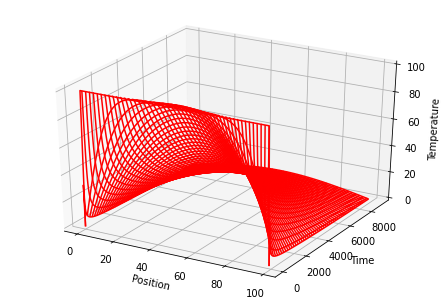

In [ ]:
fig = plt.figure()                               # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Tvar, Tnew, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')
#ax.set_xlim3d(0,50)
#ax.set_ylim3d(0,1000)
plt.show()  

#Estabilidad de la solución:

\begin{align}
T_{m,j} &= \xi(k)^{j}e^{i*km\Delta x} \\
T_{m,j+1} &= \xi(k)^{j+1}e^{i*km\Delta x} \\
T_{m\pm 1,j+1} &= \xi(k)^{j+1}e^{i*k(m\pm 1)\Delta x} \\
T_{m\pm 1,j} &= \xi(k)^{j}e^{i*k(m\pm 1)\Delta x}
\end{align}

Entonces,

\begin{align}
\left(\frac{2}{\eta} + 2\right)\xi(k)^{j+1}e^{i*km\Delta x} - \xi(k)^{j+1}e^{i*k(m + 1)\Delta x} &= \xi(k)^{j+1}e^{i*k(m - 1)\Delta x} + \xi(k)^{j}e^{i*k(m - 1)\Delta x} \\
& + \left(\frac{2}{\eta} - 2\right)\xi(k)^{j}e^{i*km\Delta x} + \xi(k)^{j}e^{i*k(m + 1)\Delta x} \\
\left(\frac{2}{\eta} + 2\right)\xi(k) - \xi(k)e^{ik\Delta x} &= \xi(k)e^{-ik\Delta x} + e^{-ik\Delta x} + \left(\frac{2}{\eta} - 2\right) + e^{ik\Delta x} \\
\left(\frac{2}{\eta} + 2 - e^{ik\Delta x} - e^{-ik\Delta x}\right)\xi(k) &= \left(\frac{2}{\eta} - 2\right) + e^{ik\Delta x} + e^{-ik\Delta x} \\
\left(\frac{1}{\eta} + 1 - \cos(k\Delta x)\right)\xi(k) &= \frac{1}{\eta} + 1 + \cos(k\Delta x) \\
\cos(k\Delta x) &= 1 - 2\sin^{2}\left(\frac{k\Delta x}{2}\right) \\
\left[\frac{1}{\eta} + 2\sin^{2}\left(\frac{k\Delta x}{2}\right)\right]\xi(k) &= \frac{1}{\eta} - 2\sin^{2}\left(\frac{k\Delta x}{2}\right) \\
\xi(k) &= \frac{1 - 2\eta\sin^{2}(k\Delta x/2)}{1 + 2\eta\sin^{2}(k\Delta x/2)}
\end{align}

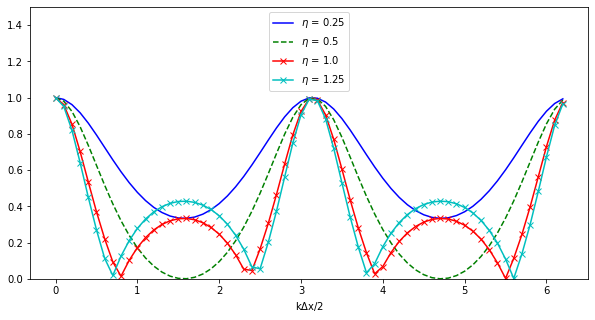

In [ ]:
xint = np.arange(0,2*np.pi,0.1)

def xi(x,kap):
  return (1-2*kap*pow(np.sin(x),2))/(1+2*kap*pow(np.sin(x),2))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xint, abs(xi(xint,0.25)), 'b-', label='$\eta$ = 0.25')
ax.plot(xint, abs(xi(xint,0.5)), 'g--', label='$\eta$ = 0.5')
ax.plot(xint, abs(xi(xint,1)), 'r-x', label='$\eta$ = 1.0')
ax.plot(xint, abs(xi(xint,1.25)), 'c-x', label='$\eta$ = 1.25')
ax.set_xlabel("k$\Delta$x/2")
ax.set_ylim([0, 1.5])
leg = ax.legend(loc=9)

#Ecuación de Onda

Para una cuerda inextensible de largo $L$ y densidad lineal de masa $\rho$,

\begin{equation}
\frac{\partial^{2} y(x,t)}{\partial x^{2}} = \frac{1}{c^{2}}\frac{\partial^{2} y(x,t)}{\partial t^{2}}
\end{equation}

con $c = \sqrt{\frac{T}{\rho}}$.

Condiciones iniciales:

\begin{equation}
y(x,0),\,\left. \frac{\partial y(x,t)}{\partial t}\right|_{t=0}
\end{equation}

Condiciones de frontera:

\begin{align}
&y(0,t),\,\left. \frac{\partial y(x,t)}{\partial x}\right|_{x=0} \\
&y(L,t),\,\left. \frac{\partial y(x,t)}{\partial x}\right|_{x=L}
\end{align}

Velocidad de oscilación de la onda:

\begin{equation}
v_{y}(x,t) = \frac{\partial y(x,y)}{\partial t}
\end{equation}

Ecuación de onda en términos de $v_{y}$:

\begin{equation}
\frac{\partial v_{y}(x,t)}{\partial t} = c^{2}\frac{\partial^{2} y(x,t)}{\partial t^{2}}
\end{equation}

Tomando derivada forward/backward en $t$ y derivada central en $x$,

\begin{align}
\frac{\partial v_{y}(x,t)}{\partial t} &\approx \frac{v_{y}(x,t+\Delta t) - v_{y}(x,t)}{\Delta t} = \frac{(v_{y})_{i,j+1}-(v_{y})_{i,j}}{\Delta t} \\
\frac{\partial v_{y}(x,t)}{\partial t} &\approx \frac{v_{y}(x,t) - v_{y}(x,t-\Delta t)}{\Delta t} = \frac{(v_{y})_{i,j}-(v_{y})_{i,j-1}}{\Delta t}\\
\frac{\partial^2 y(x,t)}{\partial x^{2}} &\approx \frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} \\
\frac{\partial y(x,t)}{\partial t} &\approx \frac{y_{i,j+1}-y_{i,j}}{\Delta t} \\
\frac{\partial y(x,t)}{\partial t} &\approx \frac{y_{i,j}-y_{i,j-1}}{\Delta t}
\end{align}


Derivada forward:

\begin{align}
\frac{(v_{y})_{i,j+1}-(v_{y})_{i,j}}{\Delta t} &= c^{2}\frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} \\
y_{i,j+1} &= y_{i,j} + \Delta t (v_{y})_{i,j}
\end{align}

Derivada backward:

\begin{align}
\frac{(v_{y})_{i,j}-(v_{y})_{i,j-1}}{\Delta t} &= c^{2}\frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} \\
y_{i,j} &= y_{i,j-1} + \Delta t (v_{y})_{i,j}
\end{align}

Tomando $t\rightarrow t+\Delta t$ en el último término,

\begin{align}
\frac{(v_{y})_{i,j+1}-(v_{y})_{i,j}}{\Delta t} &= c^{2}\frac{y_{i+1,j+1} + y_{i-1,j+1} - 2y_{i,j+1}}{\Delta x^{2}} \\
y_{i,j+1} &= y_{i,j} + \Delta t (v_{y})_{i,j+1}
\end{align}

Promediando las derivadas de velocidad y las derivadas de posición,

\begin{align}
&\text{Posición:} \\
&\frac{1}{2}*2y_{i,j+1} = \frac{1}{2}\left(y_{i,j} + \Delta t (v_{y})_{i,j}\right) + \frac{1}{2}\left(y_{i,j} + \Delta t (v_{y})_{i,j+1}\right) \\
&y_{i,j+1} - \frac{\Delta t}{2}(v_{y})_{i,j+1} = y_{i,j} + \frac{\Delta t}{2}(v_{y})_{i,j} \\
&\text{ }
\end{align}

\begin{align}
&\text{Velocidad: }\\
&\frac{(v_{y})_{i,j+1}-(v_{y})_{i,j}}{\Delta t} = \frac{c^{2}}{2}\frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} + \frac{c^{2}}{2}\frac{y_{i+1,j+1} + y_{i-1,j+1} - 2y_{i,j+1}}{\Delta x^{2}} \\
&(v_{y})_{i,j+1} - \frac{c^{2}\Delta t}{2\Delta x^{2}}\left(y_{i+1,j+1} + y_{i-1,j+1} - 2y_{i,j+1}\right) = (v_{y})_{i,j} + \frac{c^{2}\Delta t}{2\Delta x^{2}}\left(y_{i+1,j} + y_{i-1,j} - 2y_{i,j}\right)
\end{align}

Sea 

\begin{equation}
\eta_{v}\equiv \frac{c^{2}\Delta t}{2\Delta x^{2}}
\end{equation}

Entonces,

\begin{align}
(v_{y})_{i,j+1} - \eta_{v}\left(y_{i+1,j+1} + y_{i-1,j+1} - 2y_{i,j+1}\right) &= (v_{y})_{i,j} + \eta_{v}\left(y_{i+1,j} + y_{i-1,j} - 2y_{i,j}\right) \\
y_{i,j+1} - \frac{\Delta t}{2}(v_{y})_{i,j+1} &= y_{i,j} + \frac{\Delta t}{2}(v_{y})_{i,j}
\end{align}

#Ejemplo:

Cuerda de largo $L=1\text{ m}$ que parte del reposo $\left(\left. \frac{\partial y(x,t)}{\partial t}\right|_{t=0}=0\right)$ y cuya primera condición inicial es

\begin{equation}
y(x,0) =
\begin{cases}
1.25\frac{x}{L}, &x\leq 0.8L \\
5-5\frac{x}{L}. &x>0.8L
\end{cases}
\end{equation}

Las condiciones de frontera son de extremo fijo, es decir,

\begin{equation}
y(0,t) = y(L,t) = 0
\end{equation}

Solución analítica:

\begin{align}
y(x,t) &= X(x)T(t) \\
\frac{\partial^{2} y}{\partial x^{2}} &= X''(x)T(t) \\
\frac{\partial^{2} y}{\partial t^{2}} &= X(x)T''(t) \\
X''(x)T(t) &= \frac{1}{c^{2}}X(x)T''(t) \\
\frac{X''(x)}{X(x)} &= \frac{1}{c^{2}}\frac{T''(t)}{T(t)}
\end{align}

Por condiciones de frontera periódicas,

\begin{align}
\frac{X''(x)}{X(x)} &= -k^{2} \\
X''(x) + k^{2}X(x) &= 0 \\
X(x) &= A\cos(kx) + B\sin(kx) \\
X(0) &= A = 0 \rightarrow A = 0 \rightarrow X(x) = B\sin(kx) \\
X(L) &= B\sin(kL) = 0 \rightarrow kL = k_{n}L = n\pi \rightarrow k_{n} = \frac{n\pi}{L} \\
X(x) &= B\sin(k_{n}x)\\
&\text{ } \\
\frac{T''(t)}{T(t)} &= -\frac{k_{n}^{2}}{c^{2}} = -\omega_{n}^{2} \\
T''(t) +\omega_{n}^{2}T(t) &= 0 \\
T(t) &= C\sin(\omega_{n}t) + D\cos(\omega_{n}t) \\
\frac{\partial y}{\partial t} &= X(x)T'(t) \rightarrow T'(t) = \omega_{n}C\cos(\omega_{n}t) - \omega_{n}D\sin(\omega_{n}t) \\ 
\left. \frac{\partial y}{\partial t}\right|_{t=0} &= X(x)T'(0) = 0 \\
T'(0) &= \omega_{n}C = 0 \rightarrow C=0 \\
T(t) &= D\cos(\omega_{n}t)
\end{align}

Solución final:

\begin{equation}
y(x,t) = \sum_{n=1}^{\infty}B_{n}\sin(k_{n}x)\cos(\omega_{n}t)
\end{equation}

Primera condición inicial:

\begin{align}
y(x,0) &= f(x) = \sum_{n=1}^{\infty}B_{n}\sin(k_{n}x) \\
\int_{0}^{L}f(x)\sin(k_{m}x)\,dx &= \sum_{n=1}^{\infty}B_{n}\int_{0}^{L}\sin(k_{n}x)\sin(k_{m}x)\,dx \\
\int_{0}^{L}\sin(k_{n}x)\sin(k_{m}x)\,dx &= \frac{L}{2}\delta_{nm} \\
B_{n} &= \frac{2}{L}\int_{0}^{L}f(x)\sin(k_{n}x)\,dx
\end{align}

#Método de Time Stepping para la Ecuación de Onda en 1D y 2D


#Ecuación de onda en 1D:

\begin{equation}
\frac{\partial^{2} y(x,t)}{\partial t^{2}} = c^{2}\frac{\partial^{2} y(x,t)}{\partial x^{2}}
\end{equation}

Derivadas centrales:

\begin{align}
\frac{\partial^{2} y(x,t)}{\partial t^{2}} &\approx \frac{y_{i,j+1} + y_{i,j-1} - 2y_{i,j}}{\Delta t^{2}} \\
\frac{\partial^{2} y(x,t)}{\partial x^{2}} &\approx \frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} \\
i&=1,2,3,\cdots,\,j=1,2,3,\cdots
\end{align}

Entonces,

\begin{align}
\frac{y_{i,j+1} + y_{i,j-1} - 2y_{i,j}}{\Delta t^{2}} &= c^{2}*\frac{y_{i+1,j} + y_{i-1,j} - 2y_{i,j}}{\Delta x^{2}} \\
y_{i,j+1} &= 2y_{i,j} - y_{i,j-1} + \frac{c^{2}\Delta t^{2}}{\Delta x^{2}}\left(y_{i+1,j} + y_{i-1,j} - 2y_{i,j}\right)\\
c'^{2} &\equiv \frac{\Delta x^{2}}{\Delta t^{2}} \\
y_{i,j+1} &= 2y_{i,j} - y_{i,j-1} + \frac{c^{2}}{c'^{2}}\left(y_{i+1,j} + y_{i-1,j} - 2y_{i,j}\right)
\end{align}

**Estable si** $c\leq c'$.

Para $j=1$:

\begin{equation}
y_{i,2} = 2y_{i,1} - y_{i,0} + \frac{c^{2}}{c'^{2}}\left(y_{i+1,1} + y_{i-1,1} - 2y_{i,1}\right)
\end{equation}

$y_{i,0}=??$.

Derivada central en la condición inicial para $v_{y}(x,t)$:

\begin{align}
\left. \frac{\partial y(x,t)}{\partial t}\right|_{t=0} &\approx \frac{y(x,\Delta t) - y(x,-\Delta t)}{2\Delta t} = 0 \\
y(x,\Delta t) &= y(x,-\Delta t) \\
y_{i,2} &= y_{i,0}
\end{align}

Entonces,

\begin{align}
y_{i,2} &= 2y_{i,1} - y_{i,2} + \frac{c^{2}}{c'^{2}}\left(y_{i+1,1} + y_{i-1,1} - 2y_{i,1}\right) \\
y_{i,2} &= y_{i,1} + \frac{c^{2}}{2c'^{2}}\left(y_{i+1,1} + y_{i-1,1} - 2y_{i,1}\right)
\end{align}

#Ecuación de onda en 2D:

En coordenadas rectangulares y con una función $u(x,y,t)$,

\begin{align}
\frac{\partial^{2} u(x,y,t)}{\partial t^{2}} &= c^{2}\nabla^{2}u(x,y,t) \\
\nabla^{2} &= \frac{\partial^{2}}{\partial x^{2}} + \frac{\partial^{2}}{\partial y^{2}} \\
c&=\sqrt{\frac{T}{\rho}}
\end{align}

$T$: tensión superficial. $\rho:$ densidad superficial de masa.

Derivadas centrales:

\begin{align}
\frac{\partial^{2} u(x,y,t)}{\partial t^{2}} &\approx \frac{u(x,y,t+\Delta t) + u(x,y,t-\Delta t) - 2u(x,y,t)}{\Delta t^{2}} = \frac{u_{i,j}^{k+1} + u_{i,j}^{k-1} - 2u_{i,j}^{k}}{\Delta t^{2}} \\
\frac{\partial^{2} u(x,y,t)}{\partial x^{2}} &\approx \frac{u(x+\Delta x, y, t) + u(x-\Delta x, y, t) - 2u(x,y,z)}{\Delta x^{2}} = \frac{u_{i+1,j}^{k} + u_{i-1,j}^{k} - 2u_{i,j}^{k}}{\Delta x^{2}} \\
\frac{\partial^{2} u(x,y,t)}{\partial y^{2}} &\approx \frac{u(x, y +\Delta y, t) + u(x, y - \Delta y, t) - 2u(x,y,z)}{\Delta y^{2}} = \frac{u_{i,j+1}^{k} + u_{i,j-1}^{k} - 2u_{i,j}^{k}}{\Delta y^{2}} \\
i&=1,2,3,\cdots,\,j=1,2,3,\cdots\,k=1,2,3,\cdots
\end{align}

Reemplazando en la ec. de onda,

\begin{align}
\frac{u_{i,j}^{k+1} + u_{i,j}^{k-1} - 2u_{i,j}^{k}}{\Delta t^{2}} &=c^{2}\left(\frac{u_{i+1,j}^{k} + u_{i-1,j}^{k} - 2u_{i,j}^{k}}{\Delta x^{2}}  + \frac{u_{i,j+1}^{k} + u_{i,j-1}^{k} - 2u_{i,j}^{k}}{\Delta y^{2}}\right) \\
\Delta x &= \Delta y,\,c' = \frac{\Delta x}{\Delta t} \\
u_{i,j}^{k+1} &= 2u_{i,j}^{k} - u_{i,j}^{k-1} + \frac{c^{2}}{c'^{2}}\left(u_{i+1,j}^{k} + u_{i-1,j}^{k} u_{i,j+1}^{k} + u_{i,j-1}^{k} - 4u_{i,j}^{k}\right)
\end{align}

Nuevamente, para $j=1$, y tomando reposo para $t=0$ en la onda 2D,

\begin{align}
\left. \frac{\partial u(x,y,t)}{\partial t}\right|_{t=0} &\approx \frac{u(x,y,\Delta t) - u(x,y,-\Delta t)}{\Delta t} = 0 \\
u(x,y,\Delta t) &= u(x,y,-\Delta t) \\
u_{i,j}^{0} &= u_{i,j}^{2}
\end{align}

Por lo tanto,

\begin{equation}
u_{i,j}^{2} = u_{i,j}^{1} + \frac{c^{2}}{2c'^{2}}\left(u_{i+1,j}^{1} + u_{i-1,j}^{1} + u_{i,j+1}^{1} + u_{i,j-1}^{1} - 4u_{i,j}^{1}\right)
\end{equation}


#Ejemplo:

Solución numérica de la ecuación de onda en 2D con condiciones iniciales

\begin{equation}
u(x,y,0) = \sin(2x)\sin(y),\,0\leq x\leq \pi,\,0\leq y\leq \pi
\end{equation}

y con condiciones de frontera de extremo fijo, es decir,

\begin{align}
&u(0,y,t) = u(\pi,y,t) = 0 \\
&u(x,0,t) = u(x,\pi,t) = 0
\end{align}

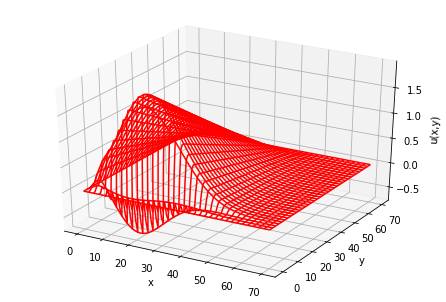

In [ ]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# Waves2D.py: Helmholtz eqn for rectangular membrane 
		
import matplotlib.pyplot as plt; 
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D

"""Init condtns: u(x,y,t=0)=0 at borders, du/dt(x,y,t=0)=0                       
    Tension = 180 N/m^2, density = 390.0 kg/m^2 (rubber)""" 
    
tim = 15    
N = 71              
c = np.sqrt(180./390)            # Speed = sqrt(ten[]/den[kg/m2;])
u = np.zeros((N,N,N),float);      v = np.zeros((N,N),float)  
incrx = np.pi/N;              incry = np.pi/N                         
cprime = c;                                                     
covercp = c/cprime
ratio = 0.5*covercp*covercp            # c/c' 0.5 for stable
  
def vibration(tim):
   y = 0.0              
   for j in range(0,N):                # Initial position
      x = 0.0
      for i in range(0,N):
         #u[i][j][0] = np.sin(2.0*x)*np.sin(1*y)   # Initial shape
         u[i][j][0] = x**2*(np.pi - x)*(np.pi - y)*np.exp(-x**2)
         x += incrx
      y += incry
     
   for j in range(1,N-1):                  # First time step
      for i in range(1,N-1):
         u[i][j][1] = u[i][j][0] + 0.5*ratio*(u[i+1][j][0]+u[i-1][j][0]
   	          + u[i][j+1][0]+u[i][j-1][0]-4.*u[i][j][0])  
  
   for k in range(1,tim):                   # Later time steps
      for j in range(1,N-1): 
         for i in range(1,N-1):
          u[i][j][k+1] = 2.*u[i][j][k] - u[i][j][k-1] + ratio*(u[i+1][j][k]  
           + u[i-1][j][k] +u[i][j+1][k]+u[i][j-1][k] - 4.*u[i][j][k])
      #u[:][:][0] = u[:][:][1]                  # Reset past  
      #u[:][:][1] = u[:][:][2]                   # Reset present
      for j in range(0,N):    
         for i in range(0,N):
            v[i][j] = u[i][j][8]   # Convert to 2D for matplotlib
   return v,u

v1 = vibration(tim)[0]                           
x1 = range(0, N)
y1 = range(0, N)
X, Y = np.meshgrid(x1,y1)                          
                 
def functz(v1):                                
    z = v1[X,Y]; return z                     
    
Z = functz(v1)
fig = plt.figure()
ax = Axes3D(fig)           
ax.plot_wireframe(X, Y, Z, color = 'r')                
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  
plt.show()                                                 


In [ ]:
vibration(N)[0]

(71, 71, 71)

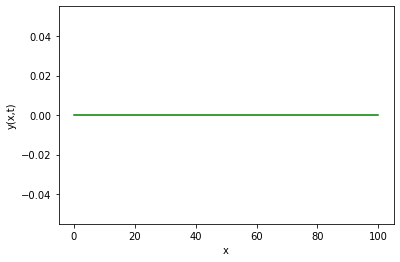

In [ ]:
#tim1 = 15    
N1 = 101              
c = np.sqrt(40./0.1)            # Speed = sqrt(ten[]/den[kg/m2;])
y1 = np.zeros((N1,N1),float);      v1 = np.zeros(N1,float)  
#incrx = np.pi/N1;              #incry = np.pi/N                         
cprime = c;                                                     
covercp = c/cprime
ratio = 0.01*covercp*covercp            # c/c' 0.5 for stable
  
def vibration1s(N1):  
                  # Initial position
  x = 0.0
  for i in range(0,N1):
    y1[i][0] = 0.1*x*(1-0.01*x)*np.sin(np.pi*x/100)   # Initial shape
         #u[i][j][0] = x**2*(np.pi - x)*(np.pi - y)
    x += 1

  #y1[0][0] = y1[N1-1][0] = 0
                        # First time step
  for i in range(1,N1-1):
    y1[i][1] = y1[i][0] + 0.5*ratio*(y1[i+1][0] + y1[i-1][0] -2*y1[i][0])  
  
  for j in range(1,N1):                   # Later time steps
    for i in range(1,N1-1):
      y1[i][j+1] = 2*y1[i][j] - y1[i][j-1] + ratio*(y1[i+1][j] + y1[i-1][j] -2*y1[i][j])
      #u[:][:][0] = u[:][:][1]                  # Reset past  
      #u[:][:][1] = u[:][:][2]                   # Reset present
          
      for i in range(0,N1):
        v1[i] = y1[i][5]   
    return v1,y1

v1 = vibration1s(N1)[0]                           
x1 = range(0, N1)
#y1 = range(0, N)
#X, Y = np.meshgrid(x1,y1)                          
                 
#def functz(v1):                                
    #z = v1[X]; return z                     
    
#Z = functz(v1)
plt.figure()
#ax = Axes3D(fig)           
plt.plot(x1, v1, color = 'g')                
plt.xlabel('x')
plt.ylabel('y(x,t)')
#plt.set_zlabel('u(x,y)')  
plt.show()                                                 


In [ ]:
vibration1s(N1)[1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00310967, 0.0031401 , 0.0032311 , ..., 0.        , 0.        ,
        0.        ],
       [0.01230694, 0.01233635, 0.01242457, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01230694, 0.01233635, 0.01242457, ..., 0.        , 0.        ,
        0.        ],
       [0.00310967, 0.0031401 , 0.0032311 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])